In [12]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch

# Train the model
from hierarchical_clustering.relaxed import optim
from hierarchical_clustering.relaxed.datasets.hc_dataset import HCTripletDataset, load_hc_data
from hierarchical_clustering.relaxed.models.linear import HypHCLinear
from hierarchical_clustering.relaxed.utils.metrics import dasgupta_cost

# Generate the data
from hierarchical_clustering.relaxed.datasets.simulate_genomes import simulate_ts, ts_to_dataset
from torch.utils.data import TensorDataset, DataLoader

# Visualise the data in the Poincare ball
import matplotlib.pyplot as plt
from util.ml_and_math.poincare import project
from hierarchical_clustering.relaxed.utils.visualization import plot_tree_from_leaves
from hierarchical_clustering.relaxed.visualize import decode_tree_and_sequences

from scipy.spatial.distance import pdist, squareform

def decode_tree(fast_decoding, model, seq_loader, device):
    embedded_sequences = []
    for ids, seqs in seq_loader:
        e = model.encode(ids.to(device), seqs.to(device))
        embedded_sequences.append(e)

    embedded_sequences = torch.cat(embedded_sequences, dim=0)
    return model.decode_tree(embedded_sequences=embedded_sequences, fast_decoding=fast_decoding)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Generate the data
ts = simulate_ts(sample_size=1024, length=1024)
ds_phased = ts_to_dataset(ts, chunks=None, phased=True)

x = ds_phased.call_genotype.sum(dim="ploidy").values.T / 2
similarities = pdist(x, metric="euclidean")
similarities = squareform(similarities)

In [26]:
# Initialise the model for training

device = 'cpu'

# set seed
seed = 1

print("Using seed {}.".format(seed))
np.random.seed(seed)
torch.manual_seed(seed)

torch.set_default_dtype(torch.float64)

num_data = x.shape[0]
num_samples = num_data * 2**2
batch_size = num_data // 4

dataset = HCTripletDataset(x, similarities, num_samples=num_samples)
triplet_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, )
seq_loader = DataLoader(TensorDataset(torch.arange(num_data), torch.from_numpy(x)), batch_size=batch_size,
                        shuffle=False)

# create model

model = HypHCLinear(rank=2, temperature=0.05, init_size=5e-2,
                    max_scale=1-1e-3, sequence_length=dataset.len_sequences, device=device)

model.to(device)

# create optimizer

lr = 5e-2
Optimizer = getattr(optim, "RAdam")
optimizer = Optimizer(model.parameters(), lr)

# training params
best_cost = np.inf
best_model = None
counter = 0
epochs = 400
fast_decoding = 1

save_path = "models/linear.pt"

Using seed 1.
Generating all pairs subset


Epoch 0 | average train loss: 16.928793 scale 0.010000
Epoch 1 | average train loss: 16.919762 scale 0.010000
Epoch 2 | average train loss: 16.919243 scale 0.010000
Epoch 3 | average train loss: 16.919233 scale 0.010000
Epoch 4 | average train loss: 16.919206 scale 0.010000
Current Dasgupta's cost: 6094543100.2117


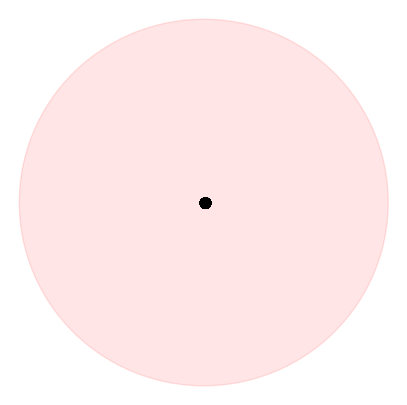

Epoch 5 | average train loss: 16.919198 scale 0.010000
Epoch 6 | average train loss: 16.919191 scale 0.010000
Epoch 7 | average train loss: 16.919186 scale 0.010000
Epoch 8 | average train loss: 16.919182 scale 0.010000
Epoch 9 | average train loss: 16.919179 scale 0.010000
Current Dasgupta's cost: 6078335214.2818


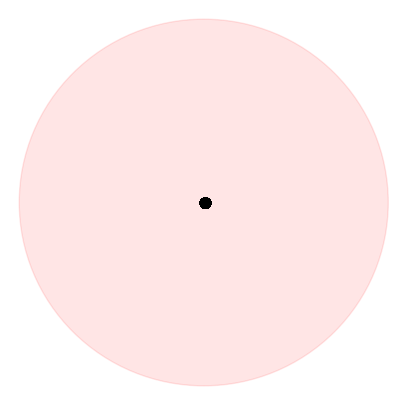

Epoch 10 | average train loss: 16.919176 scale 0.010000
Epoch 11 | average train loss: 16.919175 scale 0.010000
Epoch 12 | average train loss: 16.919173 scale 0.010000
Epoch 13 | average train loss: 16.919172 scale 0.010000
Epoch 14 | average train loss: 16.919171 scale 0.010000
Current Dasgupta's cost: 6073639845.8866


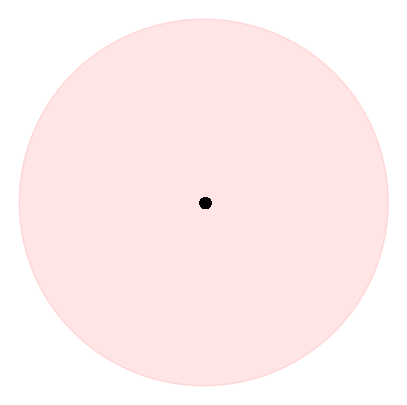

Epoch 15 | average train loss: 16.919170 scale 0.010000
Epoch 16 | average train loss: 16.919169 scale 0.010000
Epoch 17 | average train loss: 16.919168 scale 0.010000
Epoch 18 | average train loss: 16.919167 scale 0.010000
Epoch 19 | average train loss: 16.919167 scale 0.010000
Current Dasgupta's cost: 6071731426.5468


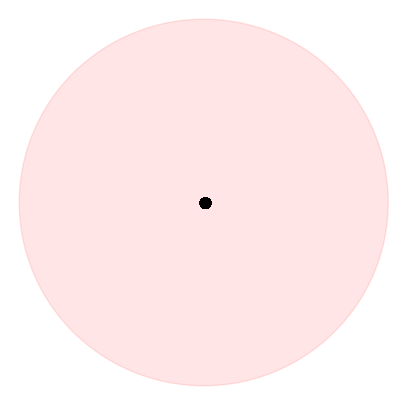

Annealing temperature to: 0.05
Annealing learning rate to: 0.05
Epoch 20 | average train loss: 16.919166 scale 0.010000
Epoch 21 | average train loss: 16.919166 scale 0.010000
Epoch 22 | average train loss: 16.919165 scale 0.010000
Epoch 23 | average train loss: 16.919165 scale 0.010000
Epoch 24 | average train loss: 16.919164 scale 0.010000
Current Dasgupta's cost: 6070724994.2900


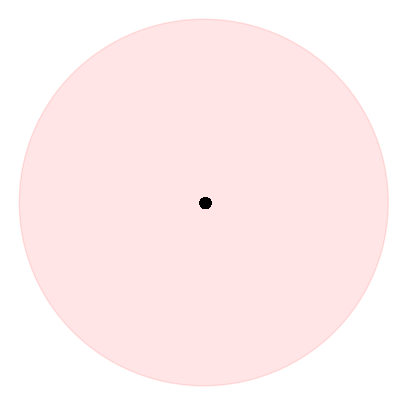

Epoch 25 | average train loss: 16.919164 scale 0.010000
Epoch 26 | average train loss: 16.919164 scale 0.010000
Epoch 27 | average train loss: 16.919163 scale 0.010000
Epoch 28 | average train loss: 16.919163 scale 0.010000
Epoch 29 | average train loss: 16.919163 scale 0.010000
Current Dasgupta's cost: 6070021846.6661


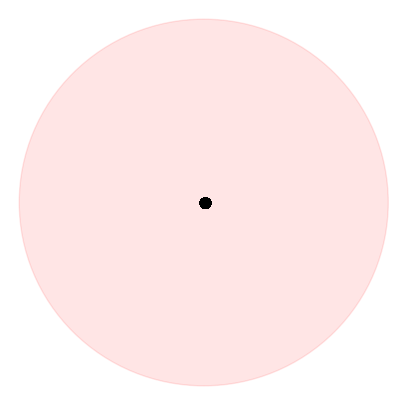

Epoch 30 | average train loss: 16.919162 scale 0.010000
Epoch 31 | average train loss: 16.919162 scale 0.010000
Epoch 32 | average train loss: 16.919162 scale 0.010000
Epoch 33 | average train loss: 16.919162 scale 0.010000
Epoch 34 | average train loss: 16.919162 scale 0.010000
Current Dasgupta's cost: 6069433814.9385


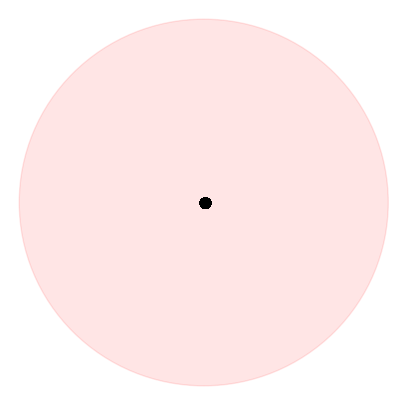

Epoch 35 | average train loss: 16.919161 scale 0.010000
Epoch 36 | average train loss: 16.919161 scale 0.010000
Epoch 37 | average train loss: 16.919161 scale 0.010000
Epoch 38 | average train loss: 16.919161 scale 0.010000
Epoch 39 | average train loss: 16.919161 scale 0.010030
Current Dasgupta's cost: 6073006957.3595


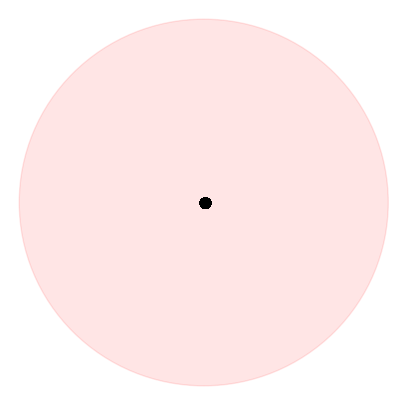

Annealing temperature to: 0.05
Annealing learning rate to: 0.05
Epoch 40 | average train loss: 16.919160 scale 0.010000
Epoch 41 | average train loss: 16.919160 scale 0.010000
Epoch 42 | average train loss: 16.919160 scale 0.010000
Epoch 43 | average train loss: 16.919160 scale 0.010045
Epoch 44 | average train loss: 16.919160 scale 0.010000
Current Dasgupta's cost: 6072219002.2096


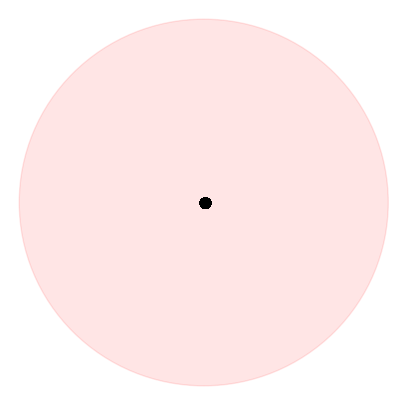

Epoch 45 | average train loss: 16.919160 scale 0.010041
Epoch 46 | average train loss: 16.919160 scale 0.010127
Epoch 47 | average train loss: 16.919160 scale 0.010238
Epoch 48 | average train loss: 16.919159 scale 0.010463
Epoch 49 | average train loss: 16.919159 scale 0.010473
Current Dasgupta's cost: 6072633600.8971


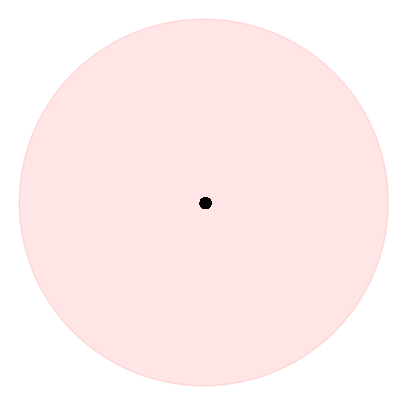

Epoch 50 | average train loss: 16.919159 scale 0.010696
Epoch 51 | average train loss: 16.919159 scale 0.010650
Epoch 52 | average train loss: 16.919159 scale 0.011057
Epoch 53 | average train loss: 16.919159 scale 0.011327
Epoch 54 | average train loss: 16.919159 scale 0.011572
Current Dasgupta's cost: 6070944175.1882


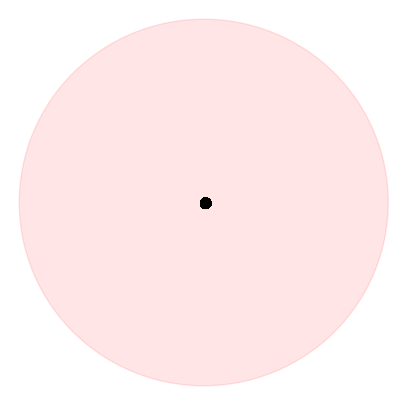

Epoch 55 | average train loss: 16.919158 scale 0.011897
Epoch 56 | average train loss: 16.919158 scale 0.012212
Epoch 57 | average train loss: 16.919158 scale 0.012715
Epoch 58 | average train loss: 16.919158 scale 0.012881
Epoch 59 | average train loss: 16.919158 scale 0.013492
Current Dasgupta's cost: 6071113350.8183


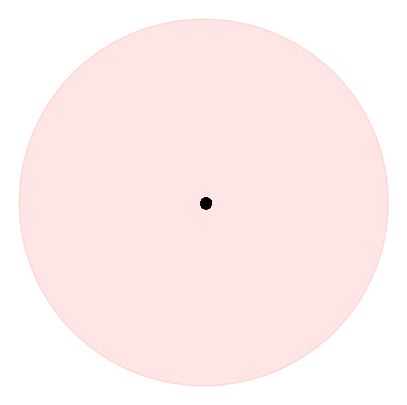

Annealing temperature to: 0.05
Annealing learning rate to: 0.05
Epoch 60 | average train loss: 16.919158 scale 0.013818
Epoch 61 | average train loss: 16.919157 scale 0.014326
Epoch 62 | average train loss: 16.919157 scale 0.015035
Epoch 63 | average train loss: 16.919157 scale 0.015736
Epoch 64 | average train loss: 16.919156 scale 0.016416
Current Dasgupta's cost: 6069598951.8268


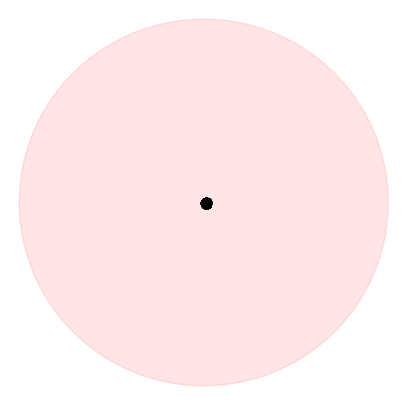

Epoch 65 | average train loss: 16.919156 scale 0.017123
Epoch 66 | average train loss: 16.919156 scale 0.017767
Epoch 67 | average train loss: 16.919155 scale 0.018674
Epoch 68 | average train loss: 16.919155 scale 0.019487
Epoch 69 | average train loss: 16.919154 scale 0.020677
Current Dasgupta's cost: 6068830102.2849


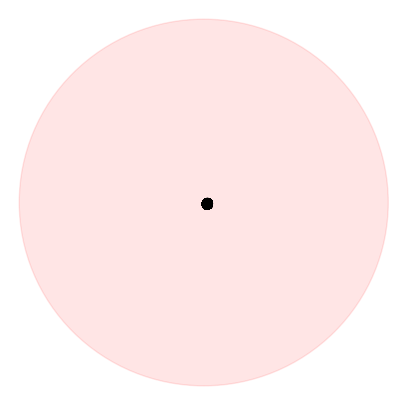

Epoch 70 | average train loss: 16.919154 scale 0.021522
Epoch 71 | average train loss: 16.919153 scale 0.022447
Epoch 72 | average train loss: 16.919152 scale 0.023640
Epoch 73 | average train loss: 16.919151 scale 0.024909
Epoch 74 | average train loss: 16.919150 scale 0.026258
Current Dasgupta's cost: 6068179392.0641


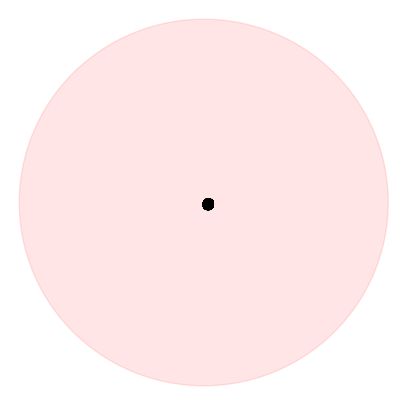

Epoch 75 | average train loss: 16.919149 scale 0.027531
Epoch 76 | average train loss: 16.919147 scale 0.028892
Epoch 77 | average train loss: 16.919146 scale 0.030603
Epoch 78 | average train loss: 16.919144 scale 0.032580
Epoch 79 | average train loss: 16.919142 scale 0.034431
Current Dasgupta's cost: 6066078182.7656


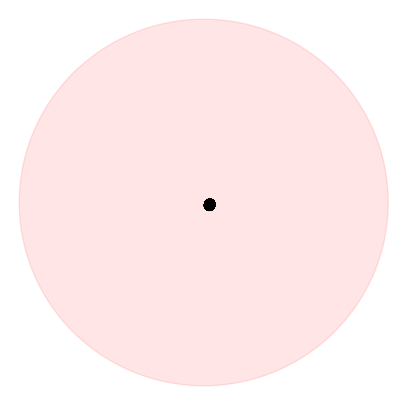

Annealing temperature to: 0.05
Annealing learning rate to: 0.05
Epoch 80 | average train loss: 16.919139 scale 0.036474
Epoch 81 | average train loss: 16.919135 scale 0.039029
Epoch 82 | average train loss: 16.919131 scale 0.041644
Epoch 83 | average train loss: 16.919126 scale 0.044532
Epoch 84 | average train loss: 16.919120 scale 0.047505
Current Dasgupta's cost: 6062465552.4315


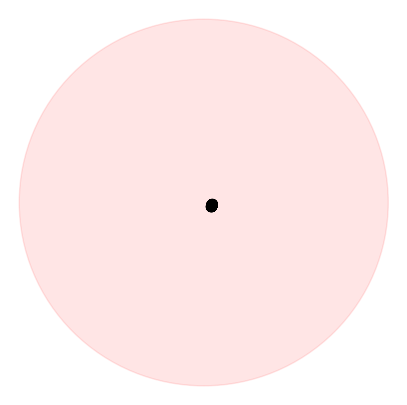

Epoch 85 | average train loss: 16.919113 scale 0.051015
Epoch 86 | average train loss: 16.919101 scale 0.055635
Epoch 87 | average train loss: 16.919088 scale 0.060341
Epoch 88 | average train loss: 16.919068 scale 0.065274
Epoch 89 | average train loss: 16.919042 scale 0.071730
Current Dasgupta's cost: 6066927158.7154


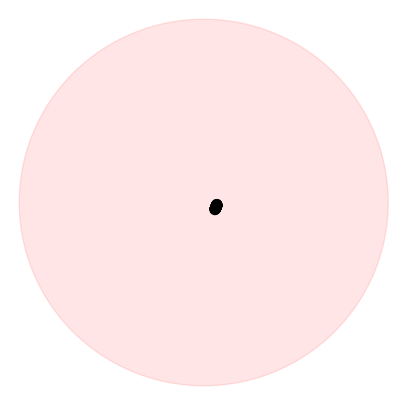

Epoch 90 | average train loss: 16.918999 scale 0.079908
Epoch 91 | average train loss: 16.918946 scale 0.090051
Epoch 92 | average train loss: 16.918804 scale 0.102580
Epoch 93 | average train loss: 16.918481 scale 0.123874
Epoch 94 | average train loss: 16.917380 scale 0.158388
Current Dasgupta's cost: 6053942557.4684


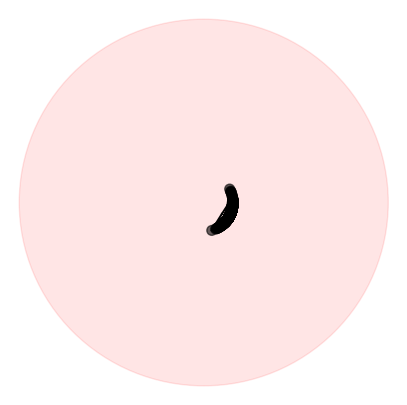

Epoch 95 | average train loss: 16.921513 scale 0.148854
Epoch 96 | average train loss: 16.918330 scale 0.150741
Epoch 97 | average train loss: 16.916784 scale 0.196541
Epoch 98 | average train loss: 16.914184 scale 0.276875
Epoch 99 | average train loss: 16.902192 scale 0.399773
Current Dasgupta's cost: 6060689335.1215


/Users/barneyh/brava/phase/NeuroSEED/hierarchical_clustering/relaxed/utils/visualization.py:27: RuntimeWarning: invalid value encountered in divide
  return np.tanh(t * np.arctanh(normx)) * x / normx


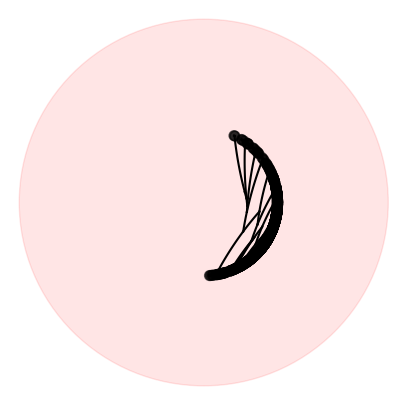

Annealing temperature to: 0.05
Annealing learning rate to: 0.05
Epoch 100 | average train loss: 16.901232 scale 0.501543
Epoch 101 | average train loss: 16.883370 scale 0.635120
Epoch 102 | average train loss: 16.867275 scale 0.716718
Epoch 103 | average train loss: 16.853170 scale 0.742228
Epoch 104 | average train loss: 16.841282 scale 0.782440
Current Dasgupta's cost: 6051583951.7709


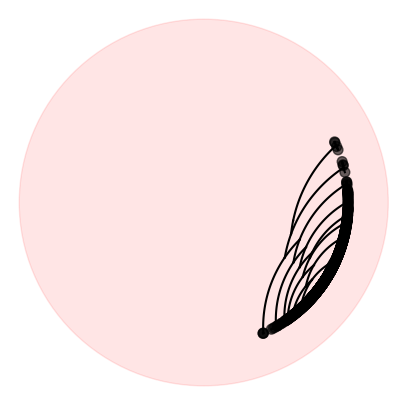

Epoch 105 | average train loss: 16.830168 scale 0.847705
Epoch 106 | average train loss: 16.829749 scale 0.865818
Epoch 107 | average train loss: 16.829924 scale 0.885371
Epoch 108 | average train loss: 16.814120 scale 0.897838
Epoch 109 | average train loss: 16.801100 scale 0.912404
Current Dasgupta's cost: 6053568973.1899


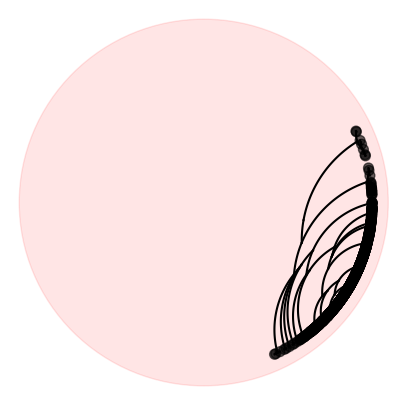

Epoch 110 | average train loss: 16.801073 scale 0.928100
Epoch 111 | average train loss: 16.795227 scale 0.933260
Epoch 112 | average train loss: 16.789002 scale 0.940815
Epoch 113 | average train loss: 16.785325 scale 0.946559
Epoch 114 | average train loss: 16.788291 scale 0.950173
Current Dasgupta's cost: 6048448669.8510


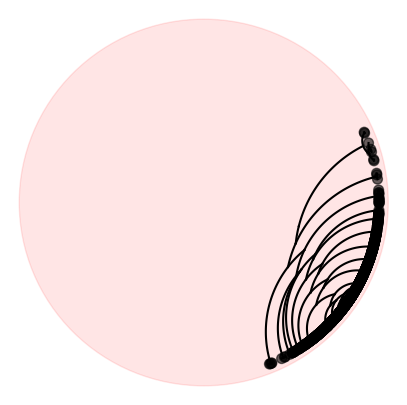

Epoch 115 | average train loss: 16.781996 scale 0.957283
Epoch 116 | average train loss: 16.779762 scale 0.959153
Epoch 117 | average train loss: 16.786756 scale 0.961692
Epoch 118 | average train loss: 16.778423 scale 0.964986
Epoch 119 | average train loss: 16.776146 scale 0.969694
Current Dasgupta's cost: 6048521262.5367


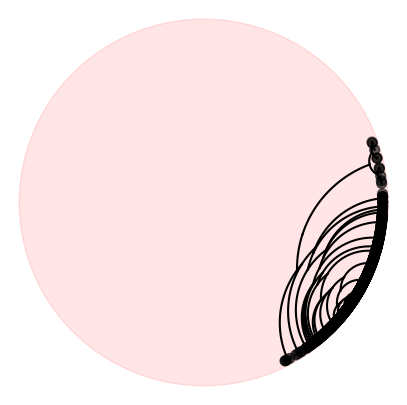

Annealing temperature to: 0.05
Annealing learning rate to: 0.05
Epoch 120 | average train loss: 16.770373 scale 0.972539
Epoch 121 | average train loss: 16.762591 scale 0.975058
Epoch 122 | average train loss: 16.767090 scale 0.976154
Epoch 123 | average train loss: 16.762409 scale 0.977734
Epoch 124 | average train loss: 16.756977 scale 0.978743
Current Dasgupta's cost: 6051495445.2700


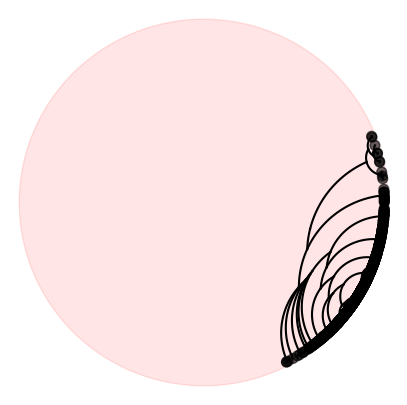

Epoch 125 | average train loss: 16.758894 scale 0.979800
Epoch 126 | average train loss: 16.758122 scale 0.980415
Epoch 127 | average train loss: 16.754878 scale 0.981391
Epoch 128 | average train loss: 16.752624 scale 0.982903
Epoch 129 | average train loss: 16.749628 scale 0.984466
Current Dasgupta's cost: 6054133705.6169


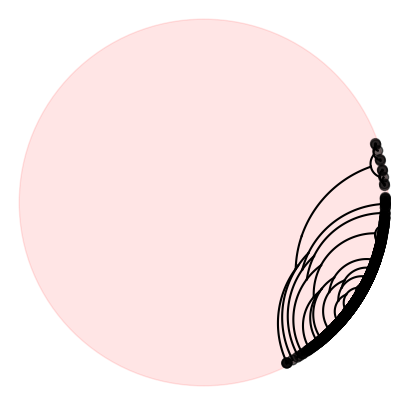

Epoch 130 | average train loss: 16.748616 scale 0.985697
Epoch 131 | average train loss: 16.744597 scale 0.987112
Epoch 132 | average train loss: 16.743108 scale 0.987861
Epoch 133 | average train loss: 16.744800 scale 0.988675
Epoch 134 | average train loss: 16.742455 scale 0.989130
Current Dasgupta's cost: 6052010282.8258


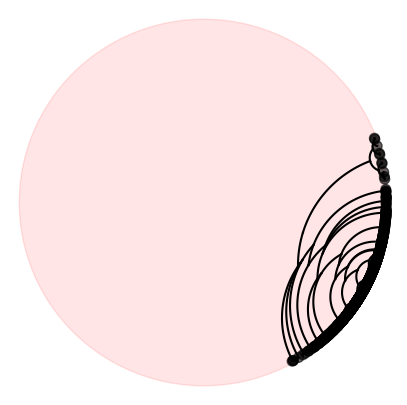

Epoch 135 | average train loss: 16.742547 scale 0.989624
Epoch 136 | average train loss: 16.744370 scale 0.990248
Epoch 137 | average train loss: 16.741815 scale 0.990593
Epoch 138 | average train loss: 16.739747 scale 0.990770
Epoch 139 | average train loss: 16.745209 scale 0.990975
Current Dasgupta's cost: 6049379676.6413


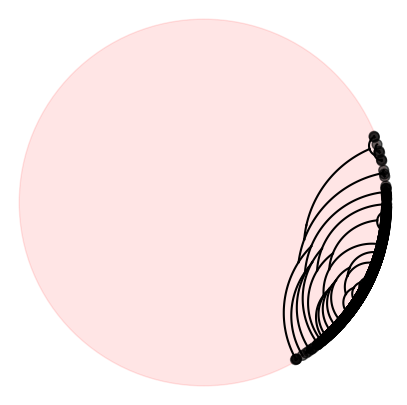

Annealing temperature to: 0.05
Annealing learning rate to: 0.05
Epoch 140 | average train loss: 16.741879 scale 0.991216
Epoch 141 | average train loss: 16.734701 scale 0.991565
Epoch 142 | average train loss: 16.740092 scale 0.992058
Epoch 143 | average train loss: 16.744131 scale 0.992205
Epoch 144 | average train loss: 16.739754 scale 0.992421
Current Dasgupta's cost: 6050607949.1989


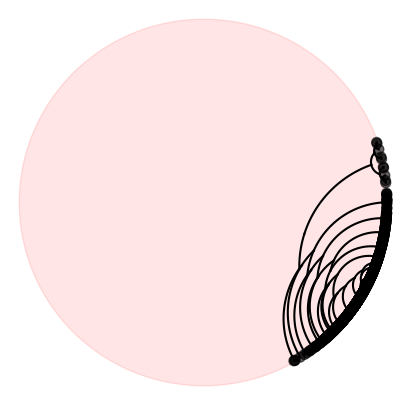

Epoch 145 | average train loss: 16.734533 scale 0.992615
Epoch 146 | average train loss: 16.735950 scale 0.992516
Epoch 147 | average train loss: 16.737517 scale 0.992658
Epoch 148 | average train loss: 16.745323 scale 0.992712
Epoch 149 | average train loss: 16.746308 scale 0.992675
Current Dasgupta's cost: 6050877281.4093


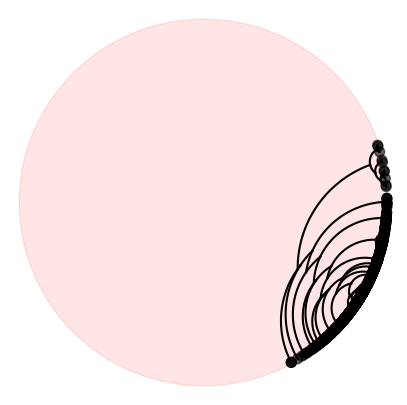

Epoch 150 | average train loss: 16.736664 scale 0.992525
Epoch 151 | average train loss: 16.734304 scale 0.992728
Epoch 152 | average train loss: 16.748682 scale 0.992884
Epoch 153 | average train loss: 16.744775 scale 0.992984
Epoch 154 | average train loss: 16.734684 scale 0.992917
Current Dasgupta's cost: 6051306028.0721


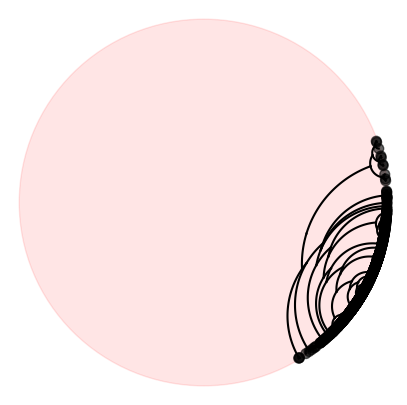

Epoch 155 | average train loss: 16.741127 scale 0.992741
Epoch 156 | average train loss: 16.735353 scale 0.992834
Epoch 157 | average train loss: 16.733269 scale 0.993152
Epoch 158 | average train loss: 16.742181 scale 0.993238
Epoch 159 | average train loss: 16.739931 scale 0.993190
Current Dasgupta's cost: 6049626135.8004


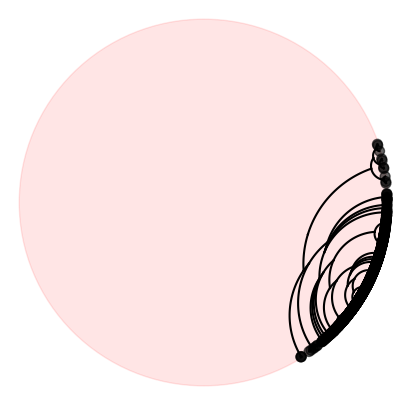

Annealing temperature to: 0.05
Annealing learning rate to: 0.05
Epoch 160 | average train loss: 16.736246 scale 0.993298
Epoch 161 | average train loss: 16.732847 scale 0.993245
Epoch 162 | average train loss: 16.733024 scale 0.993445
Epoch 163 | average train loss: 16.735003 scale 0.993363
Epoch 164 | average train loss: 16.731509 scale 0.993467
Current Dasgupta's cost: 6051995771.2448
Early stopping.


In [27]:
# training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    for step, (triple_ids, triple_sequences, triple_similarities) in enumerate(triplet_loader):

        triple_ids, triple_sequences, triple_similarities = \
            triple_ids.to(device), triple_sequences.to(device), triple_similarities.float().to(device)
        loss = model.loss(triple_ids, triple_sequences, triple_similarities)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if model.scale.data[0] < model.init_size:
            model.scale.data[0] = model.init_size

        total_loss += loss
    total_loss = total_loss.item() / (step + 1.0)
    print("Epoch {} | average train loss: {:.6f} scale {:.6f}".format(epoch, total_loss, model.scale.data[0]))

    # keep best embeddings
    if (epoch + 1) % 5 == 0:
        model.eval()
        tree = decode_tree(fast_decoding, model, seq_loader, device)
        cost = dasgupta_cost(tree, similarities)
        print("Current Dasgupta's cost: {:.4f}".format(cost))
        if cost < best_cost:
            counter = 0
            best_cost = cost
            best_model = model.state_dict()
        else:
            counter += 1
            if counter == 10:
                print("Early stopping.")
                break

        # plot tree
        seq_loader = DataLoader(TensorDataset(torch.arange(num_data), torch.from_numpy(x)), batch_size=batch_size, shuffle=False)
        tree, leaves_embeddings = decode_tree_and_sequences(fast_decoding=fast_decoding, model=model, seq_loader=seq_loader, device=device)
        leaves_embeddings = model.normalize_embeddings(leaves_embeddings)
        leaves_embeddings = project(leaves_embeddings).detach().cpu().numpy()
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        ax = plot_tree_from_leaves(ax, tree, leaves_embeddings, labels=None)
        plt.show()

    # anneal temperature
    anneal_factor = 1.0
    anneal_every = 20

    if (epoch + 1) % anneal_every == 0:
        model.anneal_temperature(anneal_factor)
        print("Annealing temperature to: {}".format(model.temperature))
        for param_group in optimizer.param_groups:
            param_group['lr'] *= anneal_factor
            lr = param_group['lr']
        print("Annealing learning rate to: {}".format(lr))

In [ ]:
# Save model
print("Optimization finished.")
if best_model is not None:
    # save best embeddings
    model.load_state_dict(best_model)
    print("Saving best model at {}".format(save_path))
    torch.save(best_model, save_path)

# evaluation
print("Final Dasgupta's cost: {:.4f}".format(best_cost))

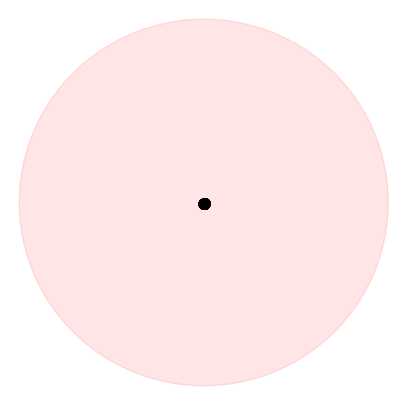